# **Recognizing handwritten digits with support vector machines**

### **Project Overview**

This project aims to classify handwritten digits (0–9) using cutting-edge deep learning architecture: **Vision Transformers (ViT)**. While earlier models like SVMs, KNNs, CNNs, and Random Forests have shown high accuracy on this task, Vision Transformers offer a modern alternative that leverages self-attention mechanisms, originally introduced in natural language processing, for image classification.

We compare this state-of-the-art method against other classical and deep learning models to observe how attention-based architectures perform in the domain of image recognition.

---

### **Objectives**

- Train a Vision Transformer model on the handwritten digits dataset.
- Evaluate model performance with classification metrics and confusion matrix.
- Compare ViT with traditional ML (SVM, KNN, RF) and deep learning (CNN) approaches.

---

### **Dataset**

We use the **Digits dataset** available in `sklearn.datasets`. It contains 1,797 grayscale images of handwritten digits, each of size **8×8 pixels**, labeled from 0 to 9.

- **Training Samples:** 1,437  
- **Testing Samples:** 360

---

### **Techniques Used**

- **Data Preprocessing:** Rescaling, reshaping, and label encoding  
- **Traditional Models:** SVM, KNN, Random Forest, Logistic Regression  
- **Deep Learning:** CNN using Keras  
- **Advanced Model:** Vision Transformer (ViT) via Hugging Face `transformers` and `datasets`  
- **Evaluation:** Accuracy, Precision, Recall, F1-score, Confusion Matrix


### **Loading the dataset**

Shape of images: (1797, 8, 8)
Number of labels: 1797
Target classes: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


<Figure size 640x480 with 0 Axes>

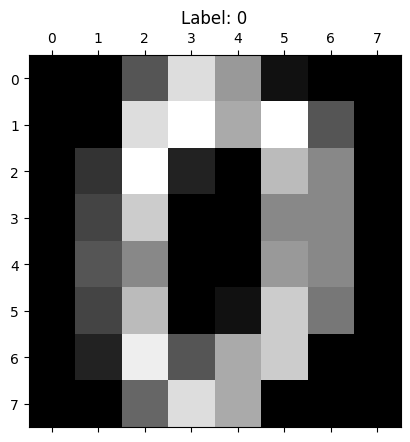

In [ ]:
# Step 1: Load the Digits Dataset
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()

# Check dataset structure
print(f"Shape of images: {digits.images.shape}")  # e.g. (1797, 8, 8)
print(f"Number of labels: {len(digits.target)}")
print("Target classes:", set(digits.target))

# Display first image and its label
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Label: {digits.target[0]}")
plt.show()

### **Preprocessing the Data for SVM**

In [ ]:
# Step 2: Preprocessing the data for SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Flatten the images (from 8x8 to 64 features)
X = digits.images.reshape((len(digits.images), -1))  # shape: (1797, 64)
y = digits.target

# Normalize pixel intensity
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check dimensions
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 1437
Test samples: 360


### **Support Vector Machine (SVM) Classifier**

In [ ]:
# Step 3: Train SVM model
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the SVM classifier
svm_clf = SVC(kernel='rbf', C=10, gamma=0.01)  # RBF kernel is common for image classification

# Fit the model on the training data
svm_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
print("✅ SVM Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ SVM Model Performance
Accuracy: 0.9833333333333333

Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  1  0  0  0 33  0]
 [ 0  0  0  0  0  0  1  1  0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      1.00      0.97        36
           8       1.00      0.94      0.97        35
           9       1.00      0.9

### **K-Nearest Neighbors (KNN) Classifier**

In [ ]:
# Step 4: Train a K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_clf.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ KNN Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


✅ KNN Model Performance
Accuracy: 0.9666666666666667

Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  1  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 36  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  2  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  1  0  0  0  0 35  0  0]
 [ 0  3  1  0  0  0  0  0 31  0]
 [ 0  0  0  0  1  0  1  0  1 33]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.90      1.00      0.95        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       0.97      0.89      0.93        35
           9       1.00      0.9

### **Random Forest Classifier**

In [ ]:
# Step 5: Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ Random Forest Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


✅ Random Forest Model Performance
Accuracy: 0.9611111111111111

Confusion Matrix:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  2 30  0]
 [ 0  0  0  1  0  0  0  1  1 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.9

### **Logistic Regression Classifier**

In [ ]:
# Step 6: Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Instantiate the model with suitable solver
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ Logistic Regression Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


✅ Logistic Regression Model Performance
Accuracy: 0.9722222222222222

Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  1  1  0  0  0  2  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  4  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  1 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9    

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### **Deep Learning with CNN (Keras + TensorFlow)**

In [ ]:
# Step 7: Deep Learning with CNN (Keras)
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 7.1 Load and reshape the data
digits = load_digits()
X = digits.images / 16.0  # Normalize pixel values (0 to 1)
y = to_categorical(digits.target)  # One-hot encode labels

# Reshape for CNN: (n_samples, height, width, channels)
X = X.reshape(-1, 8, 8, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7.2 Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# 7.3 Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7.4 Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# 7.5 Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 7.6 Metrics
print("✅ CNN Model Performance")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1839 - loss: 2.2611 - val_accuracy: 0.4931 - val_loss: 2.0129
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5449 - loss: 1.8433 - val_accuracy: 0.8681 - val_loss: 1.3228
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7362 - loss: 1.1858 - val_accuracy: 0.9028 - val_loss: 0.7361
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8071 - loss: 0.7734 - val_accuracy: 0.9028 - val_loss: 0.4695
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.5541 - val_accuracy: 0.9306 - val_loss: 0.3320
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9002 - loss: 0.4117 - val_accuracy: 0.9514 - val_loss: 0.2875
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9151 - loss: 0.3782 - val_accuracy: 0.9444 - val_loss: 0.2147
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9037 - loss: 0.3249 - val_accuracy: 0.9583 - val_loss: 0.1900
Ep

## **Vision transformer approach**

### **Advanced ViT-based (Vision Transformer)**

In [ ]:
# Step 1: Install Required Libraries
!pip install -q transformers datasets evaluate torchvision

# Step 2: Import Libraries
import numpy as np
import torch
from torchvision import transforms
from datasets import load_dataset
from transformers import ViTImageProcessor, ViTForImageClassification, TrainingArguments, Trainer, DefaultDataCollator
import evaluate

# Step 3: Load MNIST Dataset
dataset = load_dataset("mnist")

# Step 4: Define Processor & Transform
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
normalize = transforms.Normalize(mean=processor.image_mean, std=processor.image_std)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

# Step 5: Preprocess function
def preprocess(example):
    example["pixel_values"] = transform(example["image"]).numpy()
    return example

# Step 6: Apply transformation
dataset = dataset.map(preprocess)
dataset = dataset.rename_column("label", "labels")
dataset.set_format(type="torch", columns=["pixel_values", "labels"])

# Step 7: Load Model
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=10)

# Step 8: Metrics
accuracy = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

# Step 9: Training Arguments
training_args = TrainingArguments(
    output_dir="./vit-mnist",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="no",
    evaluation_strategy="epoch",
    remove_unused_columns=False
)

# Step 10: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"].shuffle(seed=42).select(range(10000)),  # Sampled for faster training
    eval_dataset=dataset["test"],
    compute_metrics=compute_metrics,
    tokenizer=processor,
    data_collator=DefaultDataCollator()
)

# Step 11: Train and Evaluate
trainer.train()
trainer.evaluate()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 812.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'